# MRC Intro & Python Basics

* Course Objective
  * 사용자의 질문을 답할 수 있는 Question Answering 모델을 밑바닥부터 개발
  
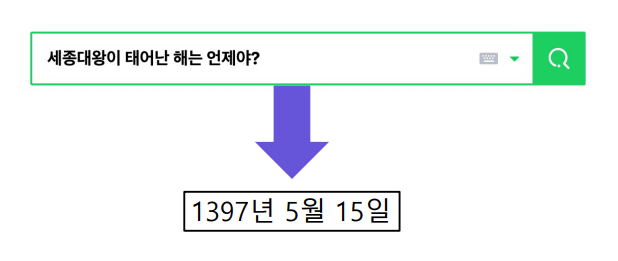

## 1. Introduction to MRC

### 1. Introduction ot Machine Reading Comprehension

* Machine Reading Comprehension(MRC)의 개념
  * 기계 독해 (Machine Reading Comprehension) : 주어진 지문 (Context)를 이해하고, 주어진 질의 (Query/Question)의 답변을 추론하는 문제

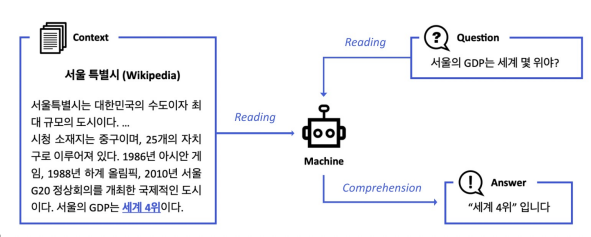

* Machine Reading Comprehension (MRC)의 개념
  * question이 들어오면 search engine을 통해 관련 context를 찾고 context 내에서 answer를 찾는 방식

  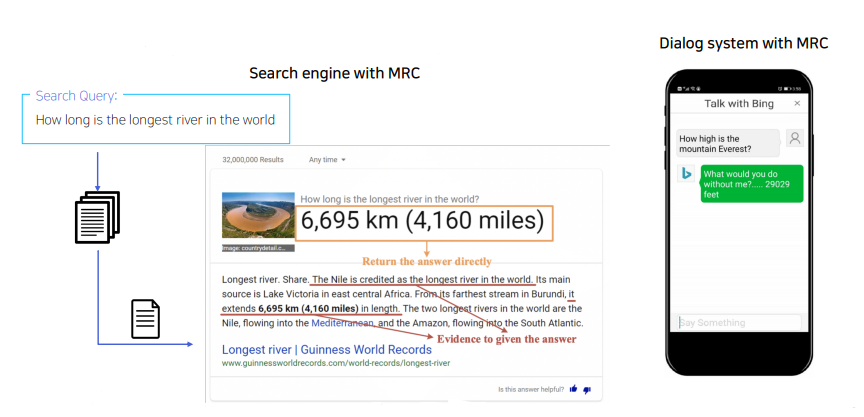


* MRC의 종류
  1. Extractive Answer Datasets
    * 질의 (question)에 대한 답이 항상 주어진 지문 (context)의 segment(or span)으로 존재

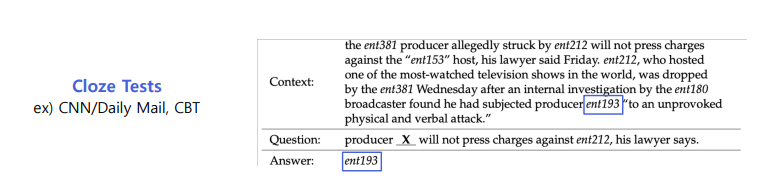

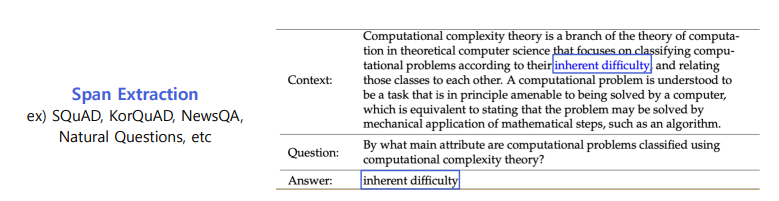

* MRC의 종류
  2. Descriptive/Narrative Answer Datasets
    * 답이 지문 내에서 추출한 span이 아니라, 질의를 보고 생성된 sentence (or free-form)의 형태

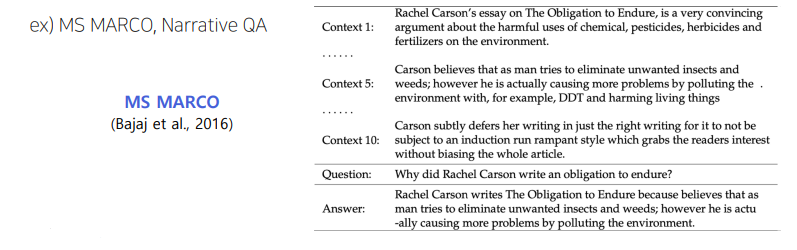

* MRC의 종류
  3. Multiple-choice Datasets
    * 질의에 대한 답을 여러 개의 answer candidates 중 하나로 고르는 형태
    * 많이 사용되지는 않음

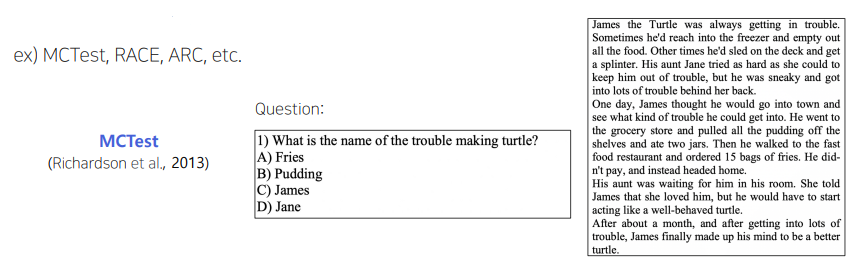

* MRC Datasets

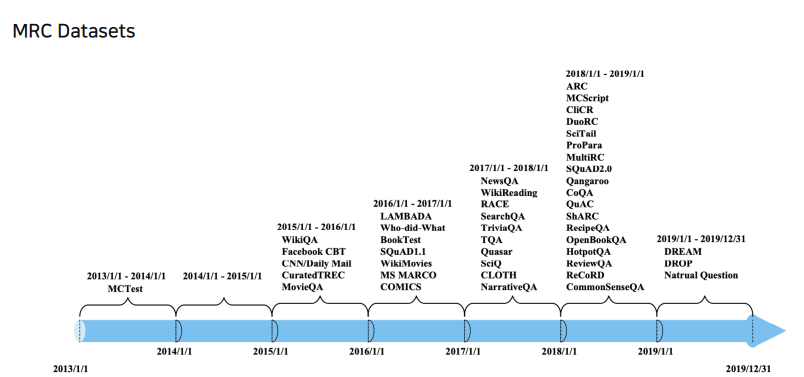

* Challenges in MRC(주의할 점)
  * 단어들의 구성이 유사하지는 않지만 동일한 의미의 문장을 이해해야함
  * ex.
    * paraphrasing : 같은 의미의 문장이지만 다른 단어로 이루어져 있는 경우, P1에서는 question과 동일한 단어가 많아서 쉽게 정답을 유추할 수 있지만, P2는 question과 다른 단어를 사용하여 정답을 유추하기 어려움
    * coreference resolution : 대명사가 가리키는 대상을 파악하는 task

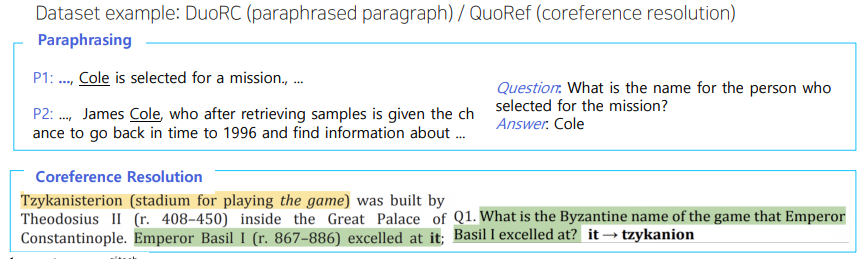

* Challenges in MRC
  * Unanswerable questions
    * Question with 'No Answer'
    * ex. SQuAD 2.0

    * little opposition(paragraph) vs. significant opposition (question) : 주어진 지문에서 질문에 대한 답을 찾을 수 없음

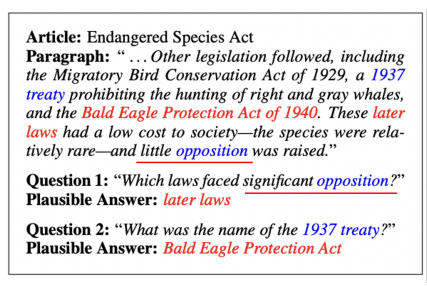

* Challenges in MRC
  * Multi-hop reasoning
    * 여러 개의 document에서 질의에 대한 supporting fact를 찾아야지만 답을 찾을 수 있음

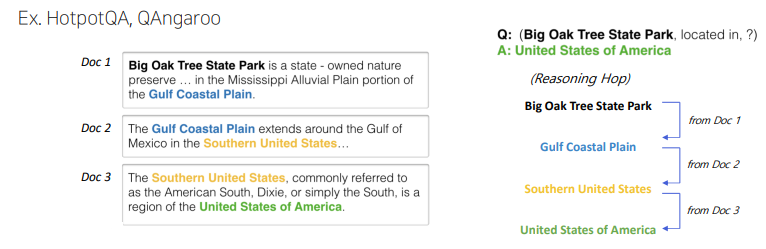

* MRC의 평가방법
  1. Exact Match / F1 Score : For extractive answer(답변이 지문 내에 존재하는 경우) and multiple-choice answer(주어진 choice 중에 답변을 고르는 경우) datasets
    * Exact Match (EM) or Accuracy
      * 예측한 답과 ground-truth이 정확히 일치하는 샘플의 비율
        * 일치하면 1, 일치하지 않으면 0
        * 답변이 조금만 달라도 점수를 받지 못하는 문제가 있음
$$\mathrm{(Number \ of \ correct \ samples)} \over \mathrm{(Number \  of \ whole \ samples)}$$
    * F1 Score
      * 예측한 답과 ground-truth 사이의 token overlap을 F1으로 계산
      * overlab을 soft하게 계산하여 겹치는 만큼 partial score를 부여함
      * 단어의 overlap만 보기 때문에 답변 자체의 언어적인 부분에서 잘 되는지 확인하기 힘듬
    * Descriptive answer(Free-form answer)는 정답과 완전히 일치하기 어렵기 때문에 이 방법을 사용하기 어려움

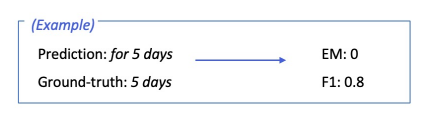

* MRC의 평가방법
  2. ROUGE-L / BLEU : For descriptive answer datasets
    * Ground-truth과 예측한 답 사이의 overlap을 계산함
    * ROUGE-L Score
      * 예측한 값과 ground-truth 사이의 overlap을 확인(ROUGE-L : LCS(Longest common subsequence)기반)
        * 각각의 단어 뿐만 아니라 score의 정의에 따라 여러 개의 단어가 겹치는지 안겹치는지(n-gram)를 LCS(Longest common subsequence)개념을 통하여 찾음
$$\mathrm{(prediction과 \ 정답과 \ 겹치는 \ 단어의 \ subsequence의 \ 길이)} \over \mathrm{(정답 \ 단어의 \ 길이)}$$
    * BLEU (Bilingual Evaluation Understudy)
      * 예측한 답과 ground-truth 사이의 precision(BLEU-n : uniform n-gram weight)
      * n을 정의하여 n-gram level에서 비교하여 n-gram 끼리 겹치는 비율을 계산함
      * n이 증가할수록 점수를 받기 어려움

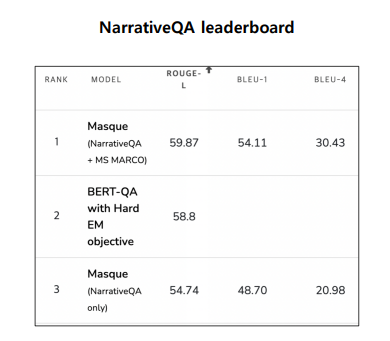

## 2. Unicode & Tokenization

* Unicode란
  * 전 세계의 모든 문자를 일관되게 표현하고 다룰 수 있도록 만들어진 문자셋
  * 각 문자마다 숫자 하나에 매핑함

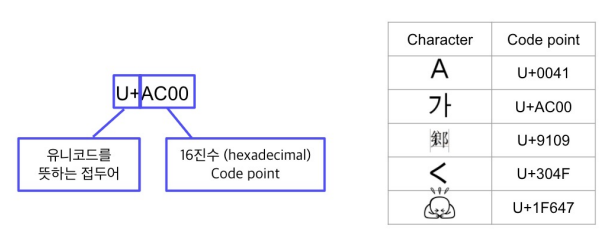

* 인코딩
  * 문자를 컴퓨터에서 저장 및 처리할 수 있게 이진수로 바꾸는 것
* UTF-8 (Unicode Transformation Format)
  * UTF-8는 현재 가장 많이 쓰는 인코딩 방식
  * 문자 타입에 따라 다른 길이의 바이트를 할당함
    * 1byte : Standard ASCII
    * 2bytes : Arabic, Hebrew, most European scripts
    * 3bytes : BMP(Basic Multilingual Plane) - 대부분의 현대 글자(한글 포함)
    * 4bytes : All Unicode characters - 이모지 등 

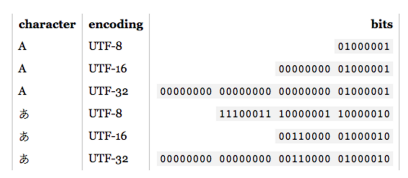

* Python에서 Unicode 다루기
  * Python3 부터 string 타입은 유니코드 표준을 사용함
  * `ord` : 문자를 유니코드 code point로 변환함
  * `chr` : Code point를 문자로 변환함

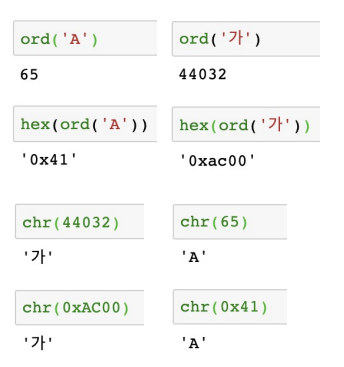

* Unicode와 한국어
  * 한국어는 한자 다음으로 유니코드에서 많은 코드를 차지하고 있는 문자
  * 완성형
    * 현대 한국어의 자모 조합으로 나타낼 수 있는 모든 완성형 한글 11,172자(가, 각, …, ) (U+AC00 ~ U+D7A3)
  * 조합형
    * 조합하여 글자를 만들 수 있는 초·중·종성 (U+1100 ~ U+11FF, U+A960 ~ U+A97F, U+D7B0 ~ U+D7FF)

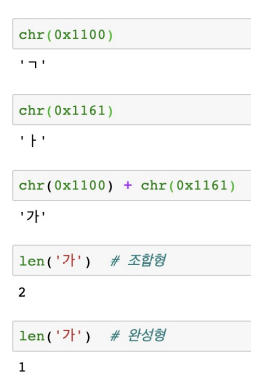

* 토크나이징
  * 텍스트를 토큰 단위로 나누는 것
  * 단어(띄어쓰기 기준), 형태소, subword 등 여러 토큰 기준이 사용됨
    * 띄어쓰기 기준이 가장 쉽지만 효율적이지 않음
* Subword 토크나이징
  * 자주 쓰이는 글자 조합은 한 단위로 취급하고, 자주 쓰이지 않는 조합은 subword로 쪼갬
  * "##"은 디코딩 (토크나이징의 반대 과정)을 할 때 해당 토큰을 앞 토큰에 띄어쓰기 없이 붙인다는 것을 뜻함

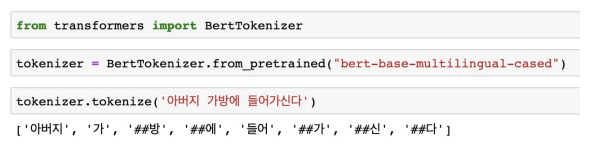

* BPE (Byte-Pair Encoding)
  * 데이터 압축용으로 제안된 알고리즘
  * NLP에서 토크나이징용으로 활발하게 사용되고 있음

  1. 가장 자주 나오는 글자 단위 Bigram (or Byte pair) 를 다른 글자로 치환함
  2. 치환된 글자를 저장해둠
  3. 1~2번을 반복함

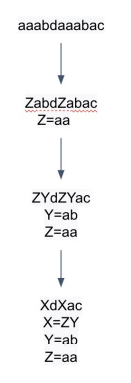

## 3. Looking into the Dataset

* KorQuAD 훑어보기

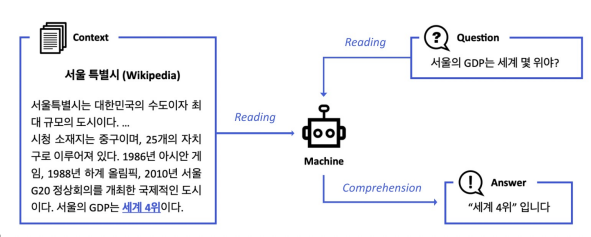

* KorQuAD란?
  * LG CNS가 AI 언어지능 연구를 위해 공개한 질의응답/기계독해 한국어 데이터셋
  * 인공지능이 한국어 질문에 대한 답변을 하도록 필요한 학습 데이터셋
  * 1,550개의 위키피디아 문서에 대해서 10,649 건의 하위 문서들과 크라우드 소싱을 통해 제작한 63,952개의 질의응답 쌍으로 구성되어 있음(TRAIN 60,407 / DEV 5,774 / TEST 3,898)
  * 누구나 데이터를 내려받고, 학습한 모델을 제출하고 공개된 리더보드에 평가를 받을 수 있음
    * 객관적인 기준을 가진 연구 결과 공유가 가능해짐
  * 현재 v1.0, v2.0 공개 : 2.0은 보다 긴 분량의 문서가 포함되어 있으며, 단순 자연어 문장 뿐 아니라 복잡한 표와 리스트 등을 포함하는 HTML 형태로 표현되어 있어 문서 전체 구조에 대한 이해가 필요함

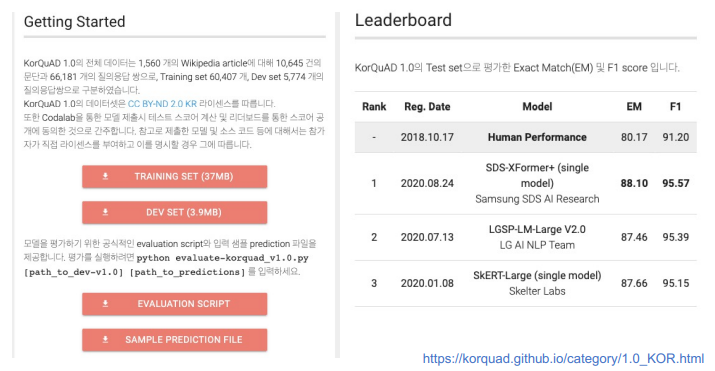

* KorQuAD 데이터 수집 과정
  * SQuAD v1.0 의 데이터 수집 방식을 벤치마크하여 표준성을 확보함

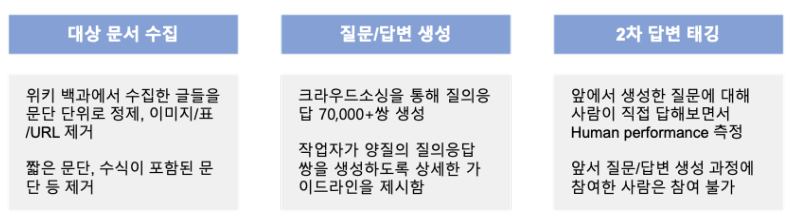

* HuggingFace datasets 라이브러리 소개
  * HuggingFace에서 만든 `datasets`는 자연어처리에 사용되는 대부분의 데이터셋과 평가 지표를 접근하고 공유할 수 있게끔 만든 라이브러리
    * KorQuAD, squad 등 MRC를 위한 데이터셋을 비슷한 방식으로 만들어놓았기 때문에 KorQuAD를 위한 모델을 다른 데이터셋에 쉽게 적용할 수 있음
  * `Numpy`, `Pandas`, `PyTorch`, `Tensorflow2`와 호환
  * 접근가능한 모든 데이터셋이 memory-mapped, cached 되어있어 데이터를 로드하면서 생기는 메모리 공간 부족이나 전처리 과정 반복의 번거로움 등을 피할 수 있음
  * KorQuAD 데이터셋의 경우 squad_kor_v1, squad_kor_v2 로 불러올 수 있음
  

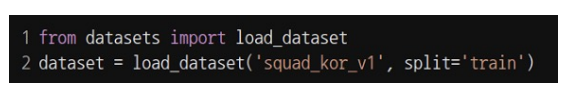

* KorQuAD 예시
  * `answer_start` : 정답 `text`가 지문 내에서 몇번째 character에서 시작하는지 알려주는 숫자
    * 답변이 지문 내에서 여러번 나오지만 답변을 유추할 수 있는 문장이 하나인경우 supervision을 제대로 주기 위해서 중요할 수 있음
    * 숫자가 주어진 경우 strong supervision, 주어지지 않은 경우 distant한 supervision


  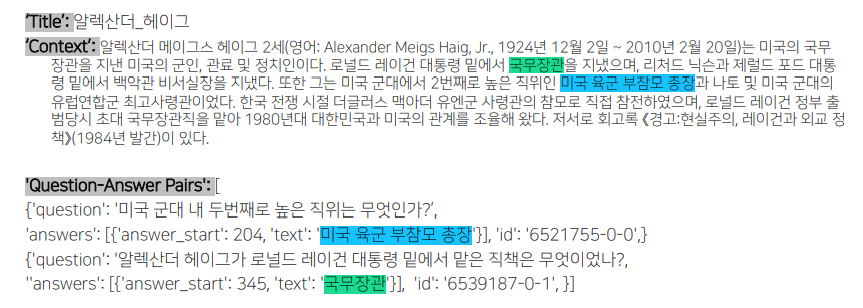

* KorQuAD 예시
  * 대부분은 질문에 대한 대답이 한개
  * 질문에 대한 대답이 여러개인 경우
    * 학습할 때는 답변을 하나만 보게됨
      * `answer_start` 와 'text`의 list length는 각각 1
    * validation 또는 test 데이터에서는 list length가 1 이상일 수 있음

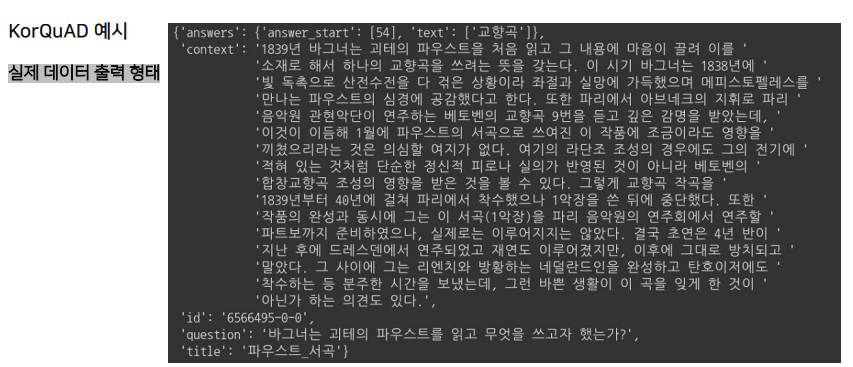

* KorQuAD 통계치
  * 질문 유형
    * 구문 변형
      * 가장 많이 차지함(paraphrasing과 비슷함)
      * 단어 등을 변경하여 답변하기 어려운 방법으로 만듬
    * 어휘 변형
      * 유의어
      * 일반 상식
    * 여러 문장의 근거 활용
      * 모델이 여러 문장의 근거를 활용하지 않고 답변 내는 것을 볼 수 있음
    * 논리적 추론

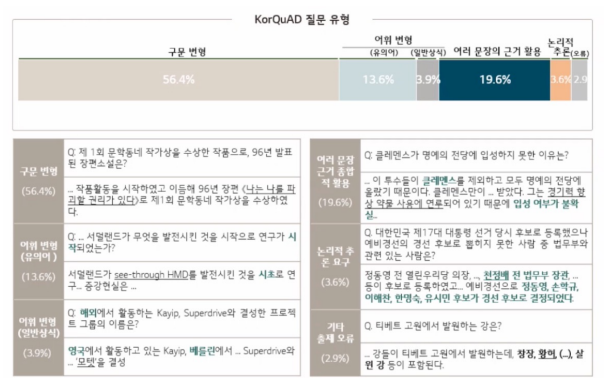

* KorQuAD 통계치
  * 답변 유형
    * 대상, 인문, 시간
      * 구체화할 수 있고 정의하기 쉬운 답변
    * 방법, 원인
      * 까다로움

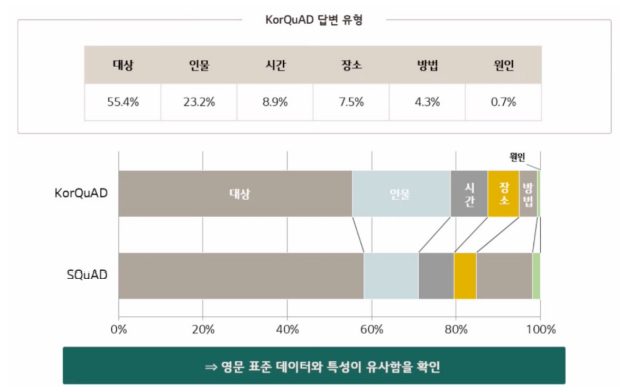